<a href="https://colab.research.google.com/github/promckkon/MK-DCNN/blob/main/MK-DCNN%20with%200dB%20NOISE%20in%20CWRU%20Dataset%2026123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import catboost
import sklearn

print("numpy:", np.__version__)
print("catboost:", catboost.__version__)
print("sklearn:", sklearn.__version__)


numpy: 1.26.4
catboost: 1.2.7
sklearn: 1.5.2


In [3]:
!pip -q uninstall -y catboost
!pip -q install -U "numpy==1.26.4"
!pip -q install --no-cache-dir --force-reinstall "catboost==1.2.7"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 147.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 155.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 180.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 164.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 195.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 166.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 138.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 164.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 184.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 212.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 154.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Dataset Input

In [5]:
df=pd.DataFrame(columns=['DE_data','fault']) # upload the dataset on googledrive

for root, dirs, files in os.walk("/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NOISE_0_faults.csv',index=False)

/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F7_OuterRace_7.mat


/tmp/ipython-input-4247073321.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['F7_OuterRace_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F6_InnerRace_21.mat
['F7_OuterRace_7' 'F6_InnerRace_21']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F2_Ball_14.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F4_InnerRace_7.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14' 'F4_InnerRace_7']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F0_Normal.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14' 'F4_InnerRace_7'
 'F0_Normal']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F8_OuterRace_14.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14' 'F4_InnerRace_7'
 'F0_Normal' 'F8_OuterRace_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F5_InnerRace_14.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14' 'F4_InnerRace_7'
 'F0_Normal' 'F8_OuterRace_14' 'F5_InnerRace_14']
/content/drive/MyDrive/CWRU_with_NOISE/CWRU_2/F1_Ball_7.mat
['F7_OuterRace_7' 'F6_InnerRace_21' 'F2_Ball_14' 'F4_InnerRace_7'
 'F0_Normal' 'F8_OuterR

# Multi-Kernel Deep 1D-CNN

In [6]:
pip install tensorflow

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

win_len = int(average_samples_per_fault / approx_windows_per_fault)
stride = int(win_len * stride_ratio)

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras import backend as K

# --- Custom Physics-Informed Loss Function ---
def custom_loss(y_true, y_pred):
    # Standard categorical crossentropy
    loss = K.categorical_crossentropy(y_true, y_pred)

    # Physics-Informed Term: penalize rapid class probability changes
    # Ensure y_pred is at least 2D for slicing
    if K.ndim(y_pred) < 2:
        y_pred = K.expand_dims(y_pred, axis=-1)

    # Ensure y_pred has more than one class dimension to compute diff
    if K.int_shape(y_pred)[-1] > 1:
        diff = y_pred[:, 1:] - y_pred[:, :-1]
        squared_diff = tf.square(diff)
        physics_term = tf.reduce_mean(squared_diff)
    else:
        physics_term = 0.0 # No physics term if only one class


    # Total loss = classification loss + regularization term
    total_loss = loss + 0.01 * physics_term  # 0.01 is tunable

    return total_loss

# --- Model Definition ---
# no_classes = len(df['fault'].unique()) # Original line that caused 10 classes
no_classes = len(encoder.classes_) # Use the encoder to get the correct number of classes
print(f"Number of output classes (no_classes): {no_classes}") # Add print statement to verify

input_shape = (X.shape[1], X.shape[2])  # Example: (784, 1)

# Head 1
inputs1 = Input(shape=input_shape)
conv1 = Conv1D(filters=64, kernel_size=200, activation='relu')(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=20)(drop1)
flat1 = Flatten()(pool1)

# Head 2
inputs2 = Input(shape=input_shape)
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2)

# Head 3
inputs3 = Input(shape=input_shape)
conv3 = Conv1D(filters=64, kernel_size=50, activation='relu')(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3)
flat3 = Flatten()(pool3)

# Merge all feature paths
merged = concatenate([flat1, flat2, flat3])

# Fully connected interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(no_classes, activation='softmax')(dense1)

# Build and compile model with custom loss
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
cnn_model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Model summary
cnn_model.summary()

Number of output classes (no_classes): 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2706, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2507, 64)  │     12,864 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 2607, 64)  │      6,464 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2657, 64)  │      3,264 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2507, 64)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2607, 64)  │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2657, 64)  │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 125, 64)   │          0 │ dropout[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 260, 64)   │          0 │ dropout_1[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 531, 64)   │          0 │ dropout_2[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8000)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16640)     │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 33984)     │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 58624)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │  5,862,500 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      1,010 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,886,102 (22.45 MB)

 Trainable params: 5,886,102 (22.45 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size =100
epochs = 20

# Explicitly convert X_train and X_test to a numeric dtype if they are object dtype
# This addresses the ValueError: Invalid dtype: object
if X_train.dtype == 'object':
    X_train = X_train.astype(np.float32)
if X_test.dtype == 'object':
    X_test = X_test.astype(np.float32)

history = cnn_model.fit([X_train,X_train,X_train], y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([X_test,X_test,X_test],y_test),shuffle=True)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1383 - loss: 4.3012 - val_accuracy: 0.2481 - val_loss: 1.9356
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.2484 - loss: 1.7479 - val_accuracy: 0.3670 - val_loss: 1.5831
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4969 - loss: 1.2749 - val_accuracy: 0.4948 - val_loss: 1.2583
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6785 - loss: 0.9155 - val_accuracy: 0.7905 - val_loss: 0.9380
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8811 - loss: 0.5297 - val_accuracy: 0.8603 - val_loss: 0.6530
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9358 - loss: 0.3021 - val_accuracy: 0.8796 - val_loss: 0.4302
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9501 - loss: 0.1824 - val_accuracy: 0.9361 - val_loss: 0.3313
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9911 - loss: 0.0888 - val_accuracy: 0.9287 - v

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


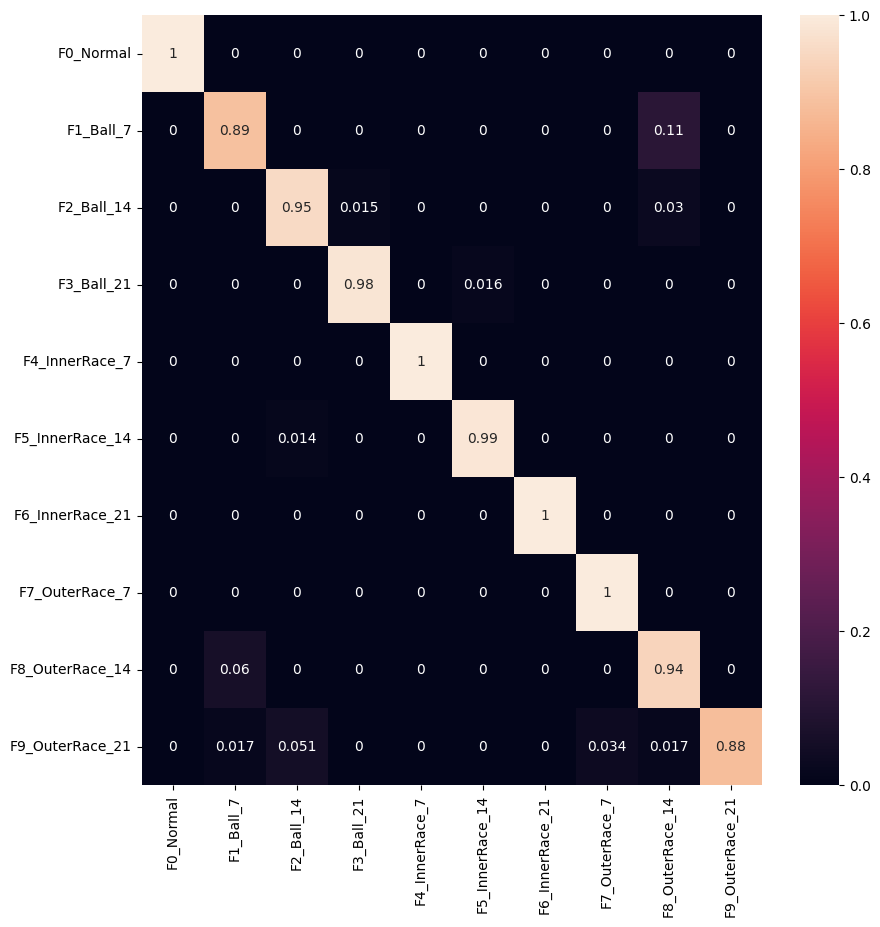

In [11]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict([X_test,X_test,X_test])


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)

In [12]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
y_viz = dummy_cnn.predict([X_train,X_train,X_train])

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b9fcff28040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1570 samples in 0.001s...
[t-SNE] Computed neighbors for 1570 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1570
[t-SNE] Computed conditional probabilities for sample 1570 / 1570
[t-SNE] Mean sigma: 2.002170
[t-SNE] Computed conditional probabilities in 0.155s
[t-SNE] Iteration 50: error = 56.4547081, gradient norm = 0.0392403 (50 iterations in 0.875s)
[t-SNE] Iteration 100: error = 51.6026382, gradient norm = 0.0165324 (50 iterations in 0.697s)
[t-SNE] Iteration 150: error = 50.4217415, gradient norm = 0.0085252 (50 iterations in 0.504s)
[t-SNE] Iteration 200: error = 49.8422089, gradient norm = 0.0076919 (50 iterations in 0.457s)
[t-SNE] Iteration 250: error = 49.4900932, gradient norm = 0.0056506 (50 iterations in 0.440s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.490093
[t-SNE] Iteration 300: error = 0.8860084, gradient norm = 0.0161176 (50 iterations in 0.471s

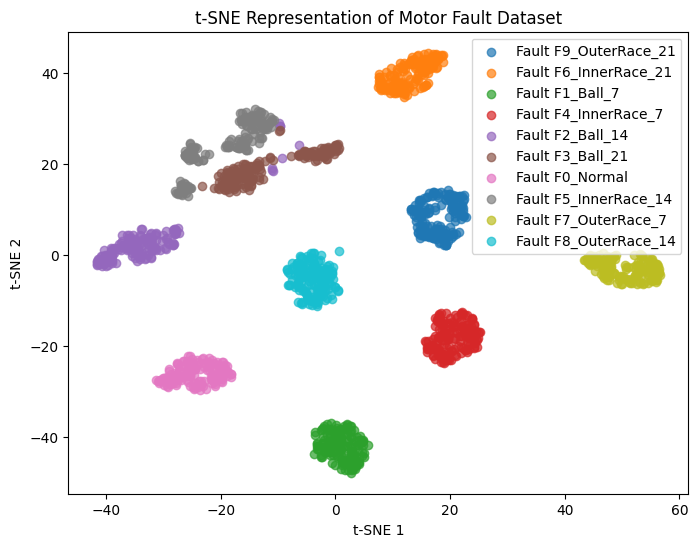

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE transformation
X_t_sne = TSNE(
    n_components=2,
    learning_rate='auto',
    verbose=2,  # Increase verbosity for more detailed feedback
    perplexity=40
).fit_transform(y_viz)

# Create DataFrame for t-SNE components
tSNEdf = pd.DataFrame(data=X_t_sne, columns=['T-SNE component 1', 'T-SNE component 2'])

# Assuming `inv_Transform_result` transforms `y_train` to get the Fault labels
tSNEdf['Fault'] = inv_Transform_result(y_train)

# Save the t-SNE DataFrame as a CSV file
tSNEdf.to_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv', index=True)
print("t-SNE results saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_tSNE_results.csv'.")

# # Plot the t-SNE results with Fault as hue
# plt.figure(figsize=(12, 12))  # Larger figure for clarity
# sns.scatterplot(
#     x='T-SNE component 1',
#     y='T-SNE component 2',
#     hue='Fault',
#     palette=sns.color_palette("husl", as_cmap=False),  # Vivid color palette
#     data=tSNEdf,
#     legend="full",
#     alpha=0.7,  # Increased transparency for better overlap clarity
#     s=100  # Larger marker size
# )

# # Add gridlines for better visualization
# plt.grid


# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNEdf['Fault'].unique():
    subset = tSNEdf[tSNEdf['Fault'] == label]
    plt.scatter(subset['T-SNE component 1'], subset['T-SNE component 2'], label=f'Fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Statistical Features

In [14]:
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt

# Total target rows
TARGET_ROWS = 1800

# Estimate the total number of samples across all fault types
total_samples = sum(len(df[df['fault'] == f]) for f in df['fault'].unique())

# Calculate suitable window size and stride
num_faults = 9
average_samples_per_fault = total_samples / num_faults
approx_windows_per_fault = TARGET_ROWS / num_faults
stride_ratio = 0.8  # Initial stride/window ratio

WINDOW_SIZE = int(average_samples_per_fault / approx_windows_per_fault)
STRIDE = int(WINDOW_SIZE * stride_ratio)

print(f"Calculated WINDOW_SIZE: {WINDOW_SIZE}, STRIDE: {STRIDE}")

# Initialize a list to store statistical features
statistical_features = []

# Loop through each fault type
for f in df['fault'].unique():
    # Extract data for the current fault type
    # Convert to NumPy array for efficiency and ensure float type
    fault_data = df[df['fault'] == f].iloc[:, 0].values.astype(float)

    # Compute windows using sliding window approach
    num_windows = (len(fault_data) - WINDOW_SIZE) // STRIDE + 1
    for i in range(num_windows):
        start = i * STRIDE
        end = start + WINDOW_SIZE
        window = fault_data[start:end]

        # Compute statistical features for the current window
        mean_val = np.mean(window)
        std_val = np.std(window)
        rms_val = np.sqrt(np.mean(np.square(window)))
        max_val = np.max(window)
        min_val = np.min(window)
        skewness_val = skew(window)
        kurtosis_val = kurtosis(window)

        # Additional statistical features
        mean_abs_val = np.mean(np.abs(window))
        form_factor = rms_val / mean_abs_val if mean_abs_val != 0 else 0
        crest_factor = max_val / rms_val if rms_val != 0 else 0

        # Store the features in a dictionary
        statistical_features.append({
            'fault': f,
            'window': i + 1,
            'mean': mean_val,
            'std': std_val,
            'rms': rms_val,
            'max': max_val,
            'min': min_val,
            'skewness': skewness_val,
            'kurtosis': kurtosis_val,
            'form_factor': form_factor,
            'crest_factor': crest_factor
        })

# Convert statistical features into a DataFrame
stat_features_df = pd.DataFrame(statistical_features)

# Display the extracted features and count of rows
print(f"Extracted {len(stat_features_df)} rows (target: {TARGET_ROWS})")
print(stat_features_df)

# Save the extracted features to a CSV file
output_file = "/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv"
stat_features_df.to_csv(output_file, index=False)
print(f"Statistical features saved to '{output_file}'.")

Calculated WINDOW_SIZE: 2706, STRIDE: 2164
Extracted 2243 rows (target: 1800)
                fault  window      mean       std       rms       max  \
0      F7_OuterRace_7       1  0.010194  1.049363  1.049412  4.775128   
1      F7_OuterRace_7       2  0.012697  1.108475  1.108548  4.877375   
2      F7_OuterRace_7       3  0.011637  0.938187  0.938259  4.561036   
3      F7_OuterRace_7       4  0.012474  1.095136  1.095207  4.720040   
4      F7_OuterRace_7       5  0.010324  0.994549  0.994603  4.720040   
...               ...     ...       ...       ...       ...       ...   
2238  F9_OuterRace_21     221  0.013152  0.649244  0.649378  4.648259   
2239  F9_OuterRace_21     222  0.012568  0.536755  0.536902  4.377827   
2240  F9_OuterRace_21     223  0.013174  0.685940  0.686067  5.076443   
2241  F9_OuterRace_21     224  0.014050  0.626737  0.626894  3.700912   
2242  F9_OuterRace_21     225  0.011118  0.415185  0.415334  2.776936   

           min  skewness   kurtosis  form_fac

In [15]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_statistical_features_with_form_and_crest_factors.csv')

# Display initial class distribution
print("Initial class distribution:")
print(df['fault'].value_counts())

# Target size for undersampling/resampling
TARGET_ROWS = 1570

# Separate all fault types
fault_classes = df['fault'].value_counts()

# Determine the number of classes
num_classes = len(fault_classes)

# Calculate how many samples to take from each class
samples_per_class = TARGET_ROWS // num_classes

# Initialize a list to store resampled data
resampled_data = []

# Loop over each class to resample them
for fault_class in fault_classes.index:
    class_data = df[df['fault'] == fault_class]
    if len(class_data) > samples_per_class:
        # Undersample
        class_data_resampled = resample(class_data, replace=False, n_samples=samples_per_class, random_state=42)
    else:
        # Upsample
        class_data_resampled = resample(class_data, replace=True, n_samples=samples_per_class, random_state=42)

    resampled_data.append(class_data_resampled)

# Concatenate the resampled data into a single DataFrame
balanced_df = pd.concat(resampled_data)

# Check if we have the exact number of rows
current_rows = len(balanced_df)
print(f"Current rows after equal resampling: {current_rows}")

# If the current rows don't match the target rows, adjust by trimming or adding rows
if current_rows > TARGET_ROWS:
    # Trim extra rows (if more than target)
    balanced_df = balanced_df.head(TARGET_ROWS)
elif current_rows < TARGET_ROWS:
    # Add rows if fewer than target, by sampling from existing data
    remaining_rows = TARGET_ROWS - current_rows
    additional_data = balanced_df.sample(n=remaining_rows, replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, additional_data])

# Shuffle the final dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
print("New class distribution:")
print(balanced_df['fault'].value_counts())

# Display final row count
print(f"Final row count: {len(balanced_df)}")

# Save the balanced dataset to a CSV file
balanced_df.to_csv("/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv", index=False)
print("Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'")


Initial class distribution:
fault
F6_InnerRace_21    226
F5_InnerRace_14    225
F9_OuterRace_21    225
F7_OuterRace_7     224
F2_Ball_14         224
F4_InnerRace_7     224
F8_OuterRace_14    224
F1_Ball_7          224
F3_Ball_21         224
F0_Normal          223
Name: count, dtype: int64
Current rows after equal resampling: 1570
New class distribution:
fault
F0_Normal          157
F8_OuterRace_14    157
F9_OuterRace_21    157
F1_Ball_7          157
F4_InnerRace_7     157
F7_OuterRace_7     157
F6_InnerRace_21    157
F5_InnerRace_14    157
F2_Ball_14         157
F3_Ball_21         157
Name: count, dtype: int64
Final row count: 1570
Balanced dataset saved as '/content/drive/MyDrive/MK-DCNN CWRU/NNOISE_0_balanced_dataset_equal_resampling_exact_1570.csv'


In [16]:
balanced_df.shape

(1570, 11)

In [17]:
balanced_df=balanced_df.sort_values(by='fault')

In [18]:
balanced_df

,fault,window,mean,std,rms,max,min,skewness,kurtosis,form_factor,crest_factor
0,F0_Normal,43,0.009751,0.065139,0.065864,0.212996,-0.215708,-0.274433,-0.045461,1.236035,3.233858
922,F0_Normal,160,0.015381,0.064958,0.066754,0.219672,-0.222801,-0.136383,0.133182,1.255333,3.290782
917,F0_Normal,190,0.014691,0.061817,0.063539,0.200479,-0.216126,-0.244098,0.003523,1.235278,3.155220
898,F0_Normal,47,0.010687,0.064335,0.065217,0.241577,-0.221550,-0.175094,0.187304,1.251745,3.704224
891,F0_Normal,87,0.012418,0.063588,0.064790,0.249087,-0.245540,-0.174432,0.529073,1.270152,3.844544
...,...,...,...,...,...,...,...,...,...,...,...
814,F9_OuterRace_21,160,0.017762,0.647137,0.647380,5.139043,-5.131531,-0.267522,19.863571,1.985886,7.938212
1428,F9_OuterRace_21,154,0.016377,0.511766,0.512028,3.145024,-3.170899,-0.299079,9.235639,1.746774,6.142291
806,F9_OuterRace_21,80,0.012851,0.733414,0.733526,4.188357,-4.271824,-0.240537,9.690810,1.849821,5.709894
171,F9_OuterRace_21,83,0.013734,0.547218,0.547391,2.989776,-3.105795,-0.225552,8.289343,1.751785,5.461870


     t-SNE 1    t-SNE 2      fault
0  20.895887 -26.683044  F0_Normal
1  34.189278  23.417244  F0_Normal
2  26.955370 -23.243952  F0_Normal
3  41.769241  -0.022141  F0_Normal
4  18.944715 -21.583633  F0_Normal


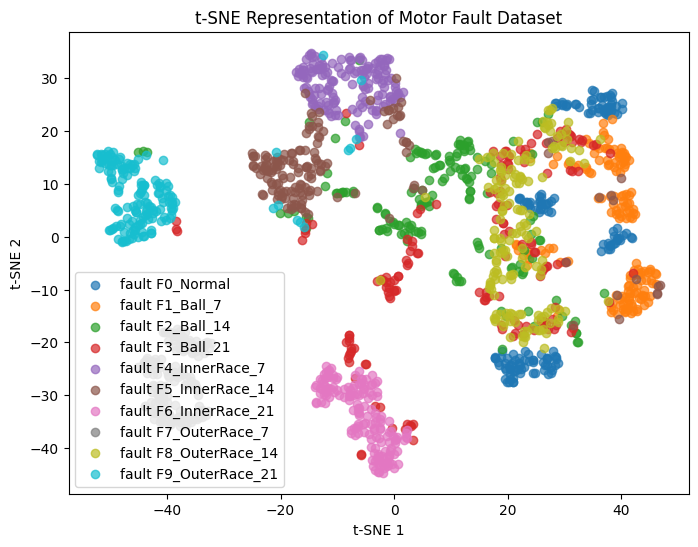

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Sort the dataset by the 'Fault' column
balanced_df = balanced_df.sort_values(by='fault')

# Separate features and target variable
X = balanced_df.drop(columns=['fault'])  # Replace 'Fault' with actual target column name
y = balanced_df['fault']

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Concatenate the normalized features with the target variable
STAT_Motor_Fault_dataset_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

# Sort the normalized dataset by 'Fault' column
STAT_Motor_Fault_dataset_normalized = STAT_Motor_Fault_dataset_normalized.sort_values(by='fault')

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)  # 2D t-SNE
X_tsne = tsne.fit_transform(X_normalized)

# Create a DataFrame for t-SNE results
tSNE_representation = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tSNE_representation['fault'] = y.reset_index(drop=True)

# Display the t-SNE representation
print(tSNE_representation.head())

# Optional: Visualization of t-SNE representation
plt.figure(figsize=(8, 6))
for label in tSNE_representation['fault'].unique():
    subset = tSNE_representation[tSNE_representation['fault'] == label]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], label=f'fault {label}', alpha=0.7)

plt.title('t-SNE Representation of Motor Fault Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [20]:
tSNE_representation

,t-SNE 1,t-SNE 2,fault
0,20.895887,-26.683044,F0_Normal
1,34.189278,23.417244,F0_Normal
2,26.955370,-23.243952,F0_Normal
3,41.769241,-0.022141,F0_Normal
4,18.944715,-21.583633,F0_Normal
...,...,...,...
1565,-50.891792,15.689425,F9_OuterRace_21
1566,-51.657982,14.083984,F9_OuterRace_21
1567,-46.108307,13.577366,F9_OuterRace_21
1568,-43.895786,4.142574,F9_OuterRace_21


In [21]:
tSNE_representation=tSNE_representation.drop(columns=['fault'])
tSNE_representation

,t-SNE 1,t-SNE 2
0,20.895887,-26.683044
1,34.189278,23.417244
2,26.955370,-23.243952
3,41.769241,-0.022141
4,18.944715,-21.583633
...,...,...
1565,-50.891792,15.689425
1566,-51.657982,14.083984
1567,-46.108307,13.577366
1568,-43.895786,4.142574


In [22]:
tSNEdf = tSNEdf.sort_values(by='Fault')

In [23]:
tSNEdf

,T-SNE component 1,T-SNE component 2,Fault
1308,-23.467812,-28.214466,F0_Normal
406,-30.983385,-27.544750,F0_Normal
404,-18.156136,-26.217646,F0_Normal
1184,-20.769381,-27.110172,F0_Normal
1183,-28.869350,-28.246120,F0_Normal
...,...,...,...
1287,19.336590,2.243137,F9_OuterRace_21
1294,17.629782,6.647725,F9_OuterRace_21
402,14.432442,5.198913,F9_OuterRace_21
531,19.277790,4.628131,F9_OuterRace_21


Combined Features

In [24]:
# import pandas as pd

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)
Motor_Fault_dataset=Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df1 and df2 are your two dataframes
# Concatenate the dataframes vertically
Motor_Fault_dataset = pd.concat([tSNE_representation, tSNEdf], axis=1)

# Sort the dataset by 'Fault' column
Motor_Fault_dataset = Motor_Fault_dataset.sort_values(by='Fault')
Motor_Fault_dataset


,t-SNE 1,t-SNE 2,T-SNE component 1,T-SNE component 2,Fault
1308,30.403358,18.547159,-23.467812,-28.214466,F0_Normal
406,0.631656,2.241667,-30.983385,-27.544750,F0_Normal
404,-0.793319,3.014643,-18.156136,-26.217646,F0_Normal
1184,-38.840549,-25.665794,-20.769381,-27.110172,F0_Normal
1183,-35.174152,-34.351662,-28.869350,-28.246120,F0_Normal
...,...,...,...,...,...
1287,22.773796,-18.715487,19.336590,2.243137,F9_OuterRace_21
1294,16.762468,-9.754831,17.629782,6.647725,F9_OuterRace_21
402,17.106754,12.059502,14.432442,5.198913,F9_OuterRace_21
531,37.989197,15.860881,19.277790,4.628131,F9_OuterRace_21


In [25]:
#Classification Report for MKDCNN

HSPSO-CatBoost


In [26]:
X = Motor_Fault_dataset.iloc[:, 0:4].values
y = Motor_Fault_dataset.iloc[:, 4].values

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels to numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=42)

Deployment:

Tuning Duration: 0:01:17.180495
Best Val Accuracy: 1.0
Best Parameters: {'iterations': 150, 'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 1.0, 'bagging_temperature': 1.0, 'random_strength': 0.5}
0:	learn: 0.9554140	test: 0.9203822	best: 0.9203822 (0)	total: 24.8ms	remaining: 7.42s
50:	learn: 0.9992038	test: 0.9904459	best: 0.9904459 (18)	total: 1.25s	remaining: 6.11s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.9904458599
bestIteration = 18

Shrink model to first 19 iterations.


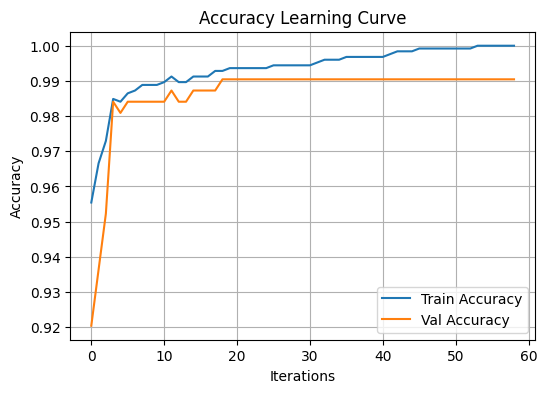

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       121
           2       0.99      0.95      0.97       121
           3       0.97      0.98      0.98       126
           4       1.00      1.00      1.00       135
           5       0.97      0.99      0.98       127
           6       1.00      1.00      1.00       118
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       134

    accuracy                           0.99      1256
   macro avg       0.99      0.99      0.99      1256
weighted avg       0.99      0.99      0.99      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
      

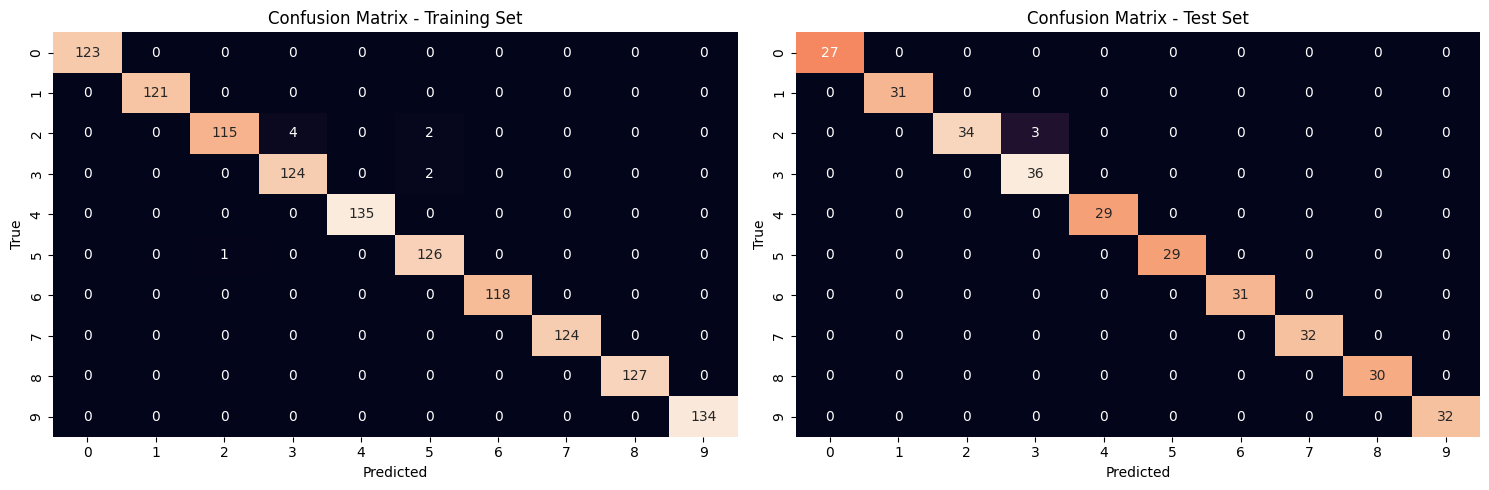

In [29]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from catboost import CatBoostClassifier, Pool


def _ensure_1d(y):
    y = np.array(y)
    return y.reshape(-1)


X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = _ensure_1d(y_train)
y_test_np = _ensure_1d(y_test)

classes = np.unique(y_train_np)
LOSS_FUNCTION = "Logloss" if len(classes) <= 2 else "MultiClass"

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr_idx, va_idx = next(sss.split(X_train_np, y_train_np))
X_tr, y_tr = X_train_np[tr_idx], y_train_np[tr_idx]
X_va, y_va = X_train_np[va_idx], y_train_np[va_idx]


search_space = {
    "iterations": list(range(50, 201, 25)),
    "depth": list(range(2, 9)),
    "learning_rate": [0.03, 0.05, 0.08, 0.1],
    "l2_leaf_reg": [1.0, 3.0, 5.0],
    "bagging_temperature": [0.5, 1.0, 1.5],
    "random_strength": [0.5, 1.0, 1.5],
}
keys = list(search_space.keys())


def project_to_space(key, value):
    choices = np.array(search_space[key], dtype=float)
    idx = int(np.argmin(np.abs(choices - float(value))))
    v = search_space[key][idx]
    if isinstance(search_space[key][0], int):
        return int(v)
    return float(v)


def clip_cast(p):
    out = {}
    for k in keys:
        out[k] = project_to_space(k, p[k])
    out["iterations"] = int(out["iterations"])
    out["depth"] = int(out["depth"])
    return out


def random_particle(rng):
    return {k: rng.choice(search_space[k]) for k in keys}


def particle_to_vector(p):
    return np.array([float(p[k]) for k in keys], dtype=float)


def vector_to_particle(v):
    return {k: float(v[i]) for i, k in enumerate(keys)}


def objective_fast(params, seed=42):
    model = CatBoostClassifier(
        iterations=int(params["iterations"]),
        depth=int(params["depth"]),
        learning_rate=float(params["learning_rate"]),
        l2_leaf_reg=float(params["l2_leaf_reg"]),
        bagging_temperature=float(params["bagging_temperature"]),
        random_strength=float(params["random_strength"]),
        loss_function=LOSS_FUNCTION,
        eval_metric="Accuracy",
        od_type="Iter",
        od_wait=20,
        verbose=False,
        random_seed=seed,
        thread_count=-1
    )
    model.fit(X_tr, y_tr, eval_set=(X_va, y_va), use_best_model=True)
    pred = model.predict(X_va).reshape(-1)
    return float(accuracy_score(y_va, pred))


def cauchy_mutation(particle, rng, gamma=0.25):
    mutated = dict(particle)
    for k in keys:
        mutated[k] = float(mutated[k]) * (1.0 + gamma * np.tan(np.pi * (rng.random() - 0.5)))
        mutated[k] = project_to_space(k, mutated[k])
    return clip_cast(mutated)


def hs_pso_optimize_fast(
    n_part=10,
    max_iter=15,
    switch_threshold=5,
    seed=42,
    w_min=0.5, w_max=0.9,
    c1=0.8, c2=0.6,
    mutation_prob=0.15,
    restart_prob=0.08,
    target_acc=0.999
):
    rng = np.random.default_rng(seed)
    dim = len(keys)

    swarm = [random_particle(rng) for _ in range(n_part)]
    vel = [np.zeros(dim, dtype=float) for _ in range(n_part)]

    pbest = [dict(s) for s in swarm]
    pbest_score = [objective_fast(s, seed=seed) for s in swarm]

    gbest_idx = int(np.argmax(pbest_score))
    gbest = dict(pbest[gbest_idx])
    gbest_score = float(pbest_score[gbest_idx])

    topology = "gbest"
    H = 1.0
    b = 0.9

    def nonlinear_inertia(it):
        numerator = (w_max - w_min) * it
        denominator = 1.0 + np.exp(-10.0 * b * ((2.0 * it) / (H * max_iter) - 1.0))
        return w_max - numerator / denominator

    for it in range(1, max_iter + 1):
        if gbest_score >= target_acc:
            break

        w = nonlinear_inertia(it)

        if it % switch_threshold == 0:
            topology = "lbest" if topology == "gbest" else "gbest"

        scores = []
        for i in range(len(swarm)):
            s = objective_fast(swarm[i], seed=seed)
            scores.append(s)
            if s > pbest_score[i]:
                pbest[i] = dict(swarm[i])
                pbest_score[i] = float(s)

        best_i = int(np.argmax(pbest_score))
        if pbest_score[best_i] > gbest_score:
            gbest = dict(pbest[best_i])
            gbest_score = float(pbest_score[best_i])

        best_indices = np.argsort(scores)[-max(1, len(swarm)//5):]
        for idx in best_indices:
            swarm.append(dict(swarm[idx]))
            vel.append(vel[idx].copy())
            scores.append(scores[idx])
            pbest.append(dict(pbest[idx]))
            pbest_score.append(float(pbest_score[idx]))

        if len(swarm) > 2 * n_part:
            worst_indices = np.argsort(scores)[:len(swarm)//4]
            for idx in sorted(worst_indices, reverse=True):
                del swarm[idx]
                del vel[idx]
                del scores[idx]
                del pbest[idx]
                del pbest_score[idx]

        for i in range(len(swarm)):
            x_vec = particle_to_vector(swarm[i])
            p_vec = particle_to_vector(pbest[i])

            if topology == "gbest":
                g_vec = particle_to_vector(gbest)
            else:
                k = min(5, len(swarm))
                neigh = rng.choice(len(swarm), size=k, replace=False)
                neigh_best = neigh[np.argmax([pbest_score[j] for j in neigh])]
                g_vec = particle_to_vector(pbest[neigh_best])

            r1 = rng.random(dim)
            r2 = rng.random(dim)

            vel[i] = w * vel[i] + c1 * r1 * (p_vec - x_vec) + c2 * r2 * (g_vec - x_vec)
            new_vec = x_vec + vel[i]
            swarm[i] = clip_cast(vector_to_particle(new_vec))

        for i in range(len(swarm)):
            if rng.random() < mutation_prob:
                swarm[i] = cauchy_mutation(swarm[i], rng, gamma=0.25)

        for i in range(len(swarm)):
            if rng.random() < restart_prob:
                swarm[i] = random_particle(rng)

    return gbest, gbest_score


start_time = datetime.now()
best_params, best_val_acc = hs_pso_optimize_fast()
end_time = datetime.now()

print("Tuning Duration:", end_time - start_time)
print("Best Val Accuracy:", best_val_acc)
print("Best Parameters:", best_params)


train_pool = Pool(X_train_np, y_train_np)
test_pool = Pool(X_test_np, y_test_np)

final_model = CatBoostClassifier(
    iterations=max(300, int(best_params["iterations"]) * 2),
    depth=int(best_params["depth"]),
    learning_rate=float(best_params["learning_rate"]),
    l2_leaf_reg=float(best_params["l2_leaf_reg"]),
    bagging_temperature=float(best_params["bagging_temperature"]),
    random_strength=float(best_params["random_strength"]),
    loss_function=LOSS_FUNCTION,
    eval_metric="Accuracy",
    od_type="Iter",
    od_wait=40,
    verbose=50,
    random_seed=42,
    thread_count=-1
)

final_model.fit(train_pool, eval_set=test_pool, use_best_model=True)

curve = final_model.get_evals_result()
train_acc = curve.get("learn", {}).get("Accuracy", [])
val_acc = curve.get("validation", {}).get("Accuracy", [])

plt.figure(figsize=(6,4))
if train_acc:
    plt.plot(train_acc, label="Train Accuracy")
if val_acc:
    plt.plot(val_acc, label="Val Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

y_pred_train = final_model.predict(X_train_np).reshape(-1)
y_pred_test = final_model.predict(X_test_np).reshape(-1)

print("Classification Report - Training Set:")
print(classification_report(y_train_np, y_pred_train))
print("Classification Report - Test Set:")
print(classification_report(y_test_np, y_pred_test))

cm_train = confusion_matrix(y_train_np, y_pred_train)
cm_test = confusion_matrix(y_test_np, y_pred_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.savefig("C-Matrix.svg", format="svg")
plt.show()





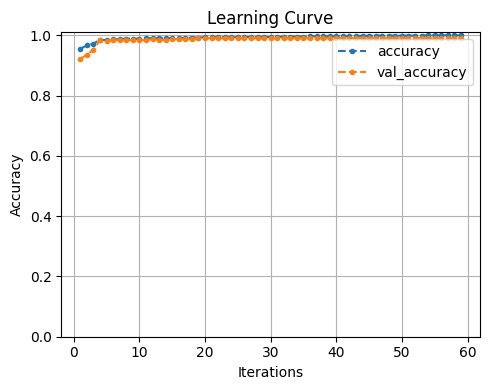

In [40]:
import numpy as np
import matplotlib.pyplot as plt

curve = final_model.get_evals_result()

train_acc = curve.get("learn", {}).get("Accuracy", [])
val_acc = curve.get("validation", {}).get("Accuracy", [])

if not train_acc or not val_acc:
    raise ValueError("找不到 Accuracy 記錄。請確認 final_model 有設定 eval_metric='Accuracy' 並且 fit 時有給 eval_set。")

x = np.arange(1, len(train_acc) + 1)

plt.figure(figsize=(5, 4))
plt.plot(x, train_acc, linestyle="--", marker="o", markersize=3, label="accuracy")
plt.plot(x, val_acc, linestyle="--", marker="o", markersize=3, label="val_accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.ylim(0, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



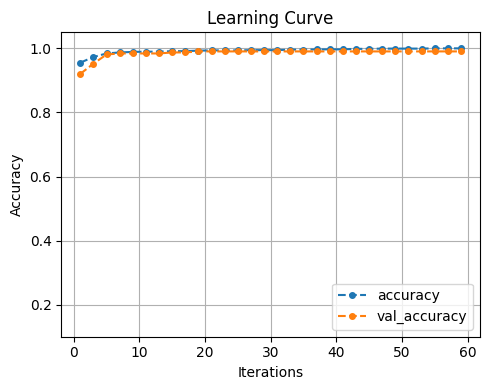

In [48]:
step = 2
x = np.arange(1, len(train_acc)+1, step)

plt.figure(figsize=(5,4))
plt.plot(x, np.array(train_acc)[::step],
         linestyle="--", marker="o", markersize=4, label="accuracy")
plt.plot(x, np.array(val_acc)[::step],
         linestyle="--", marker="o", markersize=4, label="val_accuracy")

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.grid(True)
plt.ylim(0.1, 1.05)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [31]:
learning_curve = final_model.get_evals_result()
print(learning_curve)

{'learn': {'Accuracy': [0.9554140127388535, 0.9665605095541401, 0.9729299363057324, 0.9848726114649682, 0.9840764331210191, 0.9864649681528662, 0.9872611464968153, 0.9888535031847133, 0.9888535031847133, 0.9888535031847133, 0.9896496815286624, 0.9912420382165605, 0.9896496815286624, 0.9896496815286624, 0.9912420382165605, 0.9912420382165605, 0.9912420382165605, 0.9928343949044586, 0.9928343949044586, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9936305732484076, 0.9944267515923567, 0.9944267515923567, 0.9944267515923567, 0.9944267515923567, 0.9944267515923567, 0.9944267515923567, 0.9952229299363057, 0.9960191082802548, 0.9960191082802548, 0.9960191082802548, 0.9968152866242038, 0.9968152866242038, 0.9968152866242038, 0.9968152866242038, 0.9968152866242038, 0.9968152866242038, 0.9976114649681529, 0.9984076433121019, 0.9984076433121019, 0.9984076433121019, 0.9992038216560509, 0.9992038216560509, 0.9992038216560509, 0.99920382165605

In [32]:
# Retrieve evaluation results
learning_curve = final_model.get_evals_result()

# Extract the metric values
# Assuming 'learn' corresponds to the training dataset
train_metric_values = learning_curve.get('learn', {}).get('MultiClass', [])

# Check the extracted values
if train_metric_values:
    print("Training metric values:", train_metric_values)
else:
    print("Metric 'MultiClass' not found in evaluation results.")


Training metric values: [1.6071541036191064, 1.2845843071547018, 1.0899551451160938, 0.927357157068545, 0.8117697105586174, 0.7144513725702138, 0.6282955068319326, 0.5592472194848839, 0.49914224245647637, 0.44723315125690627, 0.40061662771487144, 0.36133949995977477, 0.326975014014787, 0.29753793280716423, 0.2694922807234874, 0.24682531386980297, 0.2262166629215018, 0.20581364642965252, 0.18834709961040558, 0.17306565818913563, 0.1595756900109399, 0.14687527315424137, 0.1346250452872753, 0.12364386524230592, 0.11558326290358463, 0.10745151756113804, 0.09959758740210427, 0.09342654003955865, 0.08697716059299578, 0.08192309505979568, 0.07682795689880872, 0.07230401314691619, 0.06741566261705877, 0.0635075519110293, 0.06061284396290655, 0.057409677982544864, 0.053889700807528355, 0.0508277198570559, 0.0487089766692932, 0.04642931905923848, 0.04378031619424801, 0.04154026599072503, 0.039310253687154, 0.03781115502318476, 0.035961358437013584, 0.03413519209665648, 0.03251605971306421, 0.031

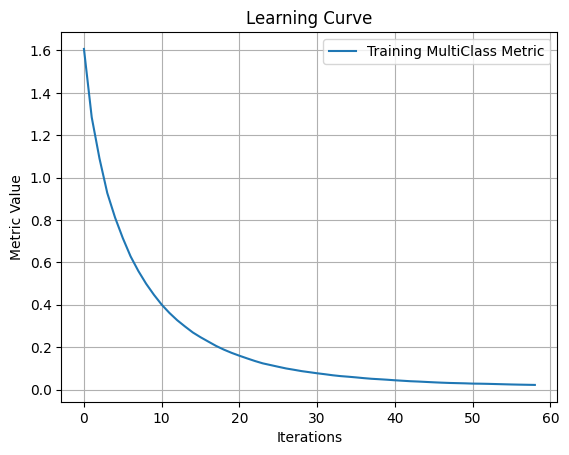

In [33]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.plot(train_metric_values, label='Training MultiClass Metric')
plt.xlabel('Iterations')
plt.ylabel('Metric Value')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       121
           2       0.99      0.95      0.97       121
           3       0.97      0.98      0.98       126
           4       1.00      1.00      1.00       135
           5       0.97      0.99      0.98       127
           6       1.00      1.00      1.00       118
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       134

    accuracy                           0.99      1256
   macro avg       0.99      0.99      0.99      1256
weighted avg       0.99      0.99      0.99      1256

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
      

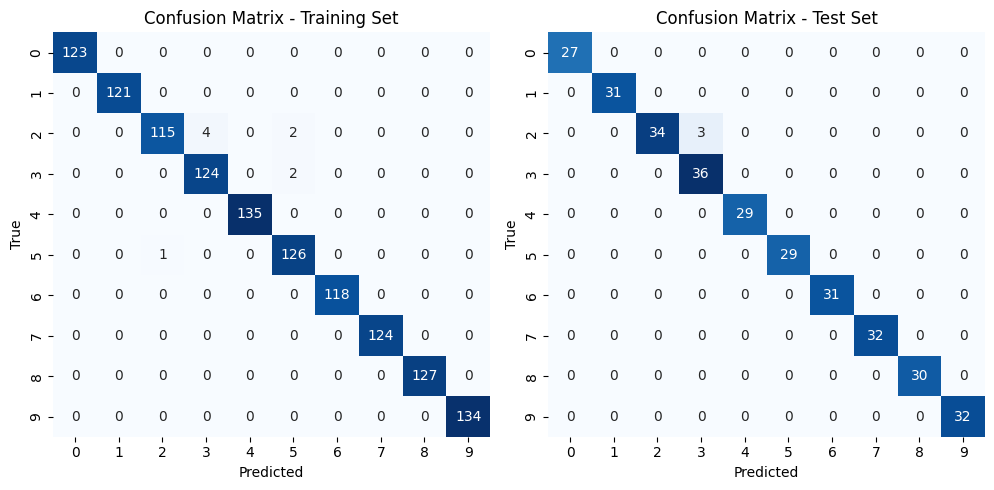

Deployment Duration: 0:01:22.662239


In [34]:
# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

print("Classification Report - Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Test Set:")
print(classification_report(y_test, y_pred_test))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.savefig('C-Matrix.svg', format='svg')
plt.show()

end_time = datetime.now()
print('Deployment Duration: {}'.format(end_time - start_time))